In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import datetime as dt
import seaborn as sns
import glob
import folium
import calmap
#import waffle

In [2]:
mpl.style.use(['seaborn-whitegrid'])
pd.options.display.float_format = "{:.2f}".format

# See some data

In [3]:
micro_2013 = pd.read_csv('2015.csv')
micro_2013.head()

,Year,City and county code,Housing classification code,House size code,Building age code,Survey month,Sale price,landlord,Deposit,Monthly rent
0,2015,11110,1,14,13,2015-07,889000,479000,200000,950
1,2015,11110,1,14,13,2015-07,859000,459000,200000,900
2,2015,11110,1,12,14,2015-07,522000,384000,100000,1350
3,2015,11110,1,12,14,2015-07,542000,392000,100000,1400
4,2015,11110,1,11,14,2015-07,299000,233000,30000,1000


In [4]:
micro_2013.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151560 entries, 0 to 151559
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   Year                         151560 non-null  int64 
 1   City and county code         151560 non-null  int64 
 2   Housing classification code  151560 non-null  int64 
 3   House size code              151560 non-null  int64 
 4   Building age code            151560 non-null  int64 
 5   Survey month                 151560 non-null  object
 6   Sale price                   151560 non-null  int64 
 7   landlord                     151560 non-null  int64 
 8   Deposit                      151560 non-null  int64 
 9   Monthly rent                 151560 non-null  int64 
dtypes: int64(9), object(1)
memory usage: 11.6+ MB


# Put all the files together 2015-2021

In [5]:
def read_the_csv(path):
    li = []
    all_files = glob.glob(path + '/*.csv')
    
    for files in all_files:
        df = pd.read_csv(files)
        li.append(df)
        
    fname = pd.concat(li, axis= 0, ignore_index=True)
    return fname

In [6]:
all_rent = read_the_csv('D:/Data Science projects/python/Projects/Real State')

In [7]:
all_rent['Survey month'] = pd.to_datetime(all_rent['Survey month']).dt.date.apply(lambda x: x.strftime('%Y-%m'))
all_rent['Year'] = pd.to_datetime(all_rent.Year, format='%Y').dt.year

In [8]:
all_rent

,Year,City and county code,Housing classification code,House size code,Building age code,Survey month,Sale price,landlord,Deposit,Monthly rent
0,2015,11110,1,14,13,2015-07,889000.00,479000,200000,950
1,2015,11110,1,14,13,2015-07,859000.00,459000,200000,900
2,2015,11110,1,12,14,2015-07,522000.00,384000,100000,1350
3,2015,11110,1,12,14,2015-07,542000.00,392000,100000,1400
4,2015,11110,1,11,14,2015-07,299000.00,233000,30000,1000
...,...,...,...,...,...,...,...,...,...,...
1879326,2021,50130,7,73,72,2021-04,469000.00,274000,10000,1490
1879327,2021,50130,7,73,72,2021-04,521000.00,313000,15000,1460
1879328,2021,50130,7,73,72,2021-04,1175000.00,582000,20000,2360
1879329,2021,50130,7,73,74,2021-04,232000.00,124000,6000,790


In [9]:
all_rent[['Year', 'City and county code', 'House size code', 'Building age code', 'Housing classification code']] = all_rent[['Year', 'City and county code', 'House size code', 'Building age code', 'Housing classification code']].astype(str)

In [10]:
all_rent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1879331 entries, 0 to 1879330
Data columns (total 10 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Year                         object 
 1   City and county code         object 
 2   Housing classification code  object 
 3   House size code              object 
 4   Building age code            object 
 5   Survey month                 object 
 6   Sale price                   float64
 7   landlord                     int64  
 8   Deposit                      int64  
 9   Monthly rent                 int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 143.4+ MB


In [11]:
all_rent.describe()

,Sale price,landlord,Deposit,Monthly rent
count,1879331.00,1879331.00,1879331.00,1879331.00
mean,279178.77,178011.91,42527.36,601.34
std,300210.00,164696.65,64304.79,469.87
min,4400.00,2000.00,100.00,10.00
25%,108000.00,70000.00,10000.00,330.00
50%,195000.00,135000.00,20000.00,500.00
75%,335000.00,230000.00,50000.00,720.00
max,8358000.00,3520000.00,2500000.00,11500.00


In [12]:
all_rent['House size code'].replace({'10':'apt +40m²', '11':'apt 40-60m²', '12':'apt 60-85m²', '13':'apt 85-102m²', '14':'apt 102-135m²', '15':'apt +135m²',
                                 '30':'1floor +40m²', '31':'1floor 40-60m²', '33':'1floor 60-95m²', '35':'1floor +85m²',
                                 '71':'multi fam +99m²', '73': 'multi fam 99-331 m²', '75':'multi fam +331m²'}, inplace= True)

all_rent['Housing classification code'].replace({'1': 'Apartment', '3':'1floor flat', '7': 'family size house'}, inplace= True)

all_rent['Building age code'].replace({'11':'apt +5 yrs', '12':'apt 5-10 yrs', '13':'apt 10-15 yrs', '14':'apt 15-20 yrs', '15':'apt +20 yrs',
                                 '32':'1floor +10yrs', '34':'1floor 10-20yrs', '35':'1floor 20yrs', '72':'mul fam +10yrs',
                                 '74': 'multi fam 10-20yrs', '75':'20yrs'}, inplace= True)

In [13]:
all_rent

,Year,City and county code,Housing classification code,House size code,Building age code,Survey month,Sale price,landlord,Deposit,Monthly rent
0,2015,11110,Apartment,apt 102-135m²,apt 10-15 yrs,2015-07,889000.00,479000,200000,950
1,2015,11110,Apartment,apt 102-135m²,apt 10-15 yrs,2015-07,859000.00,459000,200000,900
2,2015,11110,Apartment,apt 60-85m²,apt 15-20 yrs,2015-07,522000.00,384000,100000,1350
3,2015,11110,Apartment,apt 60-85m²,apt 15-20 yrs,2015-07,542000.00,392000,100000,1400
4,2015,11110,Apartment,apt 40-60m²,apt 15-20 yrs,2015-07,299000.00,233000,30000,1000
...,...,...,...,...,...,...,...,...,...,...
1879326,2021,50130,family size house,multi fam 99-331 m²,mul fam +10yrs,2021-04,469000.00,274000,10000,1490
1879327,2021,50130,family size house,multi fam 99-331 m²,mul fam +10yrs,2021-04,521000.00,313000,15000,1460
1879328,2021,50130,family size house,multi fam 99-331 m²,mul fam +10yrs,2021-04,1175000.00,582000,20000,2360
1879329,2021,50130,family size house,multi fam 99-331 m²,multi fam 10-20yrs,2021-04,232000.00,124000,6000,790


# -----------General praphs (By year)

## Sale Price

Text(0.5, 0, 'Year')

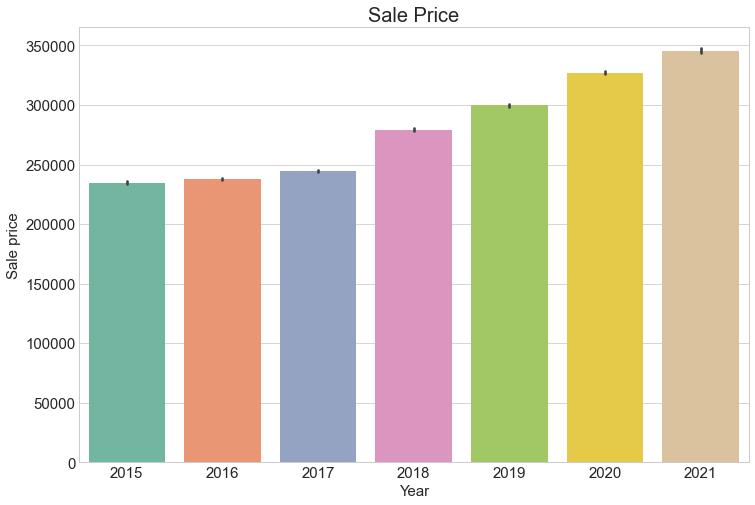

In [14]:
fig, ax = plt.subplots(figsize = (12, 8))
sns.barplot(x = all_rent['Year'], y= all_rent['Sale price'], palette= "Set2")
plt.title('Sale Price', size = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel('Sale price', fontsize = 15)
plt.xlabel('Year', fontsize = 15)

Text(0.5, 0, 'Year')

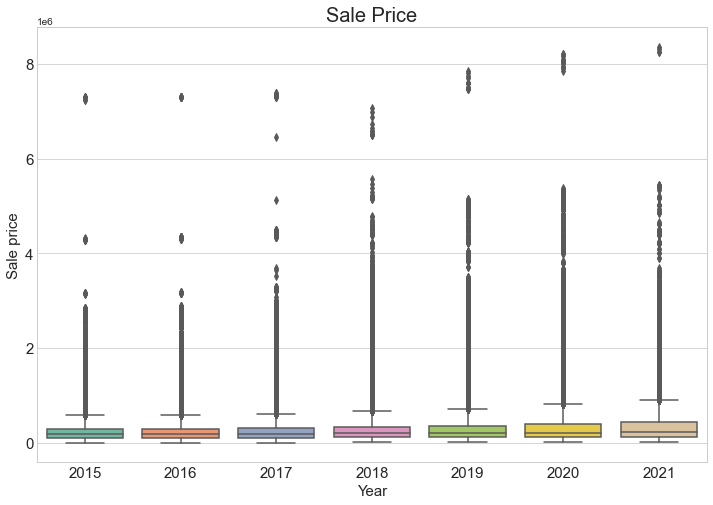

In [15]:
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = all_rent['Year'], y= all_rent['Sale price'], palette= "Set2")
plt.title('Sale Price', size = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel('Sale price', fontsize = 15)
plt.xlabel('Year', fontsize = 15)

## Deposit

In [16]:
all_rent[all_rent['Year']== "2020"]['Deposit'].max()

2500000

In [17]:
# fig, ax = plt.subplots(figsize = (12, 8))
# sns.barplot(x = all_rent['Year'], y= all_rent['Deposit'], palette= "Set2")
# plt.title('Deposit', size = 20)
# plt.xticks(fontsize = 15) 
# plt.yticks(fontsize = 15)
# plt.ylabel('Deposit', fontsize = 15)
# plt.xlabel('Year', fontsize = 15)

Text(0.5, 0, 'Year')

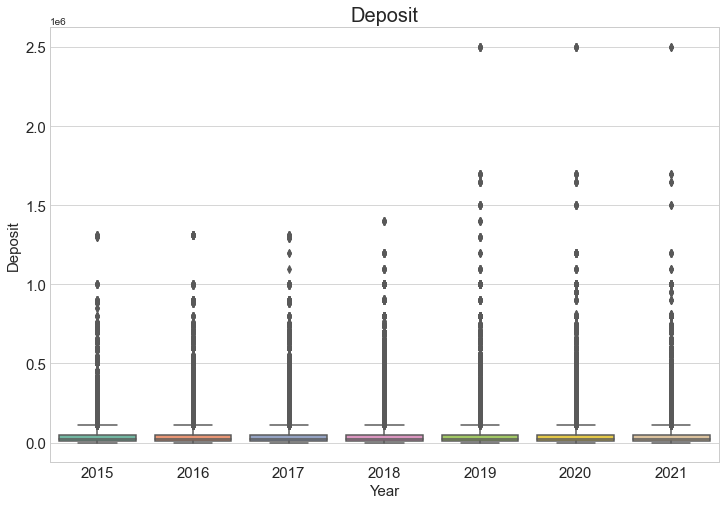

In [18]:
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = all_rent['Year'], y= all_rent['Deposit'], palette= "Set2")
plt.title('Deposit', size = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel('Deposit', fontsize = 15)
plt.xlabel('Year', fontsize = 15)

## Monthly rent

Text(0.5, 0, 'Year')

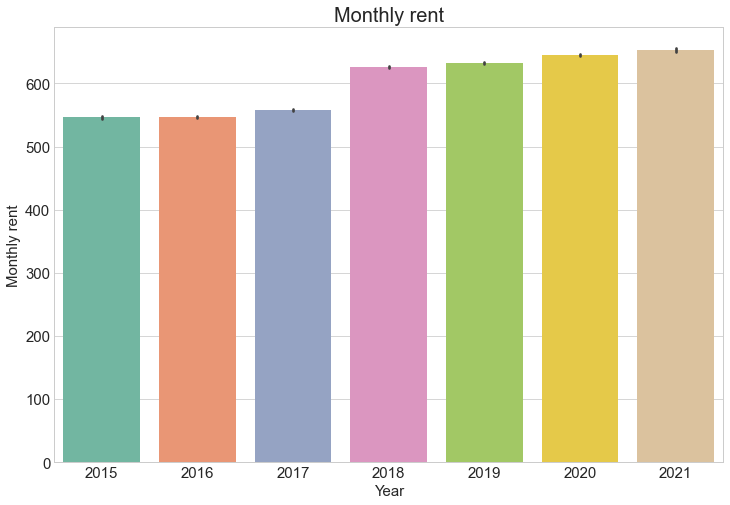

In [19]:
fig, ax = plt.subplots(figsize = (12, 8))
sns.barplot(x = all_rent['Year'], y= all_rent['Monthly rent'], palette= "Set2")
plt.title('Monthly rent', size = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel('Monthly rent', fontsize = 15)
plt.xlabel('Year', fontsize = 15)

Text(0.5, 0, 'Year')

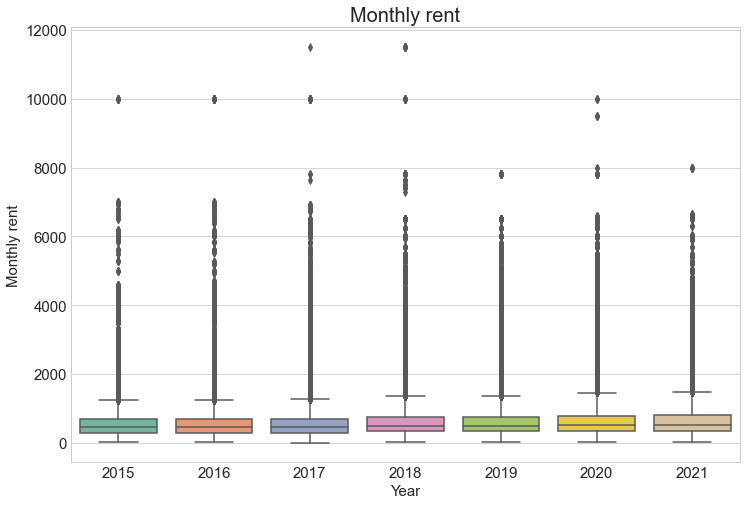

In [20]:
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = all_rent['Year'], y= all_rent['Monthly rent'], palette= "Set2")
plt.title('Monthly rent', size = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel('Monthly rent', fontsize = 15)
plt.xlabel('Year', fontsize = 15)

# ------------ By groups 

### By Housing Classification (all years)

In [21]:
by_hous = all_rent.groupby('Housing classification code')['Sale price'].agg('sum')
by_hous = by_hous.to_frame()

In [22]:
by_hous = by_hous.sort_values('Sale price', ascending=False)

Text(0, 0.5, 'Sale Price')

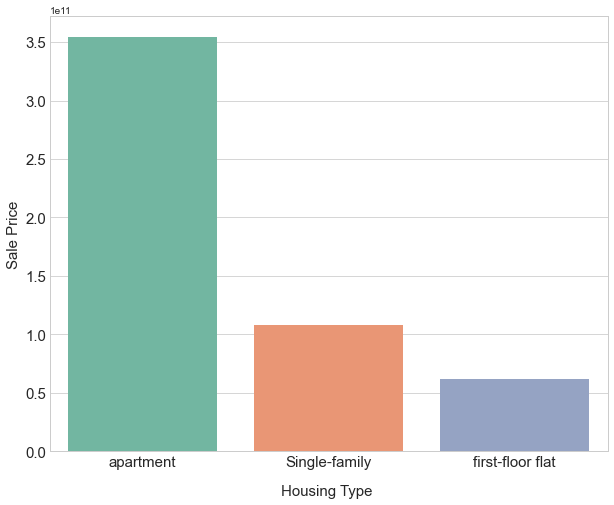

In [23]:
fig, ax = plt.subplots(figsize = (10, 8))
sns.barplot(x = by_hous.index, y = by_hous['Sale price'], order=by_hous.index, palette= "Set2")
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
ax.set_xticklabels(["apartment", "Single-family", "first-floor flat" ])
plt.xlabel('Housing Type ', size = 15, labelpad=15)
plt.ylabel('Sale Price', size = 15)

### By year 2021

In [24]:
by_hous_2021 = all_rent[all_rent['Year'] == "2021"].groupby('Housing classification code')['Sale price'].agg('sum')
by_hous_2021 = by_hous_2021.to_frame()

In [25]:
by_hous_2021.sort_values('Sale price', ascending= False, inplace=True)

In [26]:
by_hous_2021

,Sale price
Housing classification code,
Apartment,27860925222.00
family size house,7152141600.00
1floor flat,4190892100.00


Text(0.5, 1.0, 'Sale Price by Housing classification code year 2021')

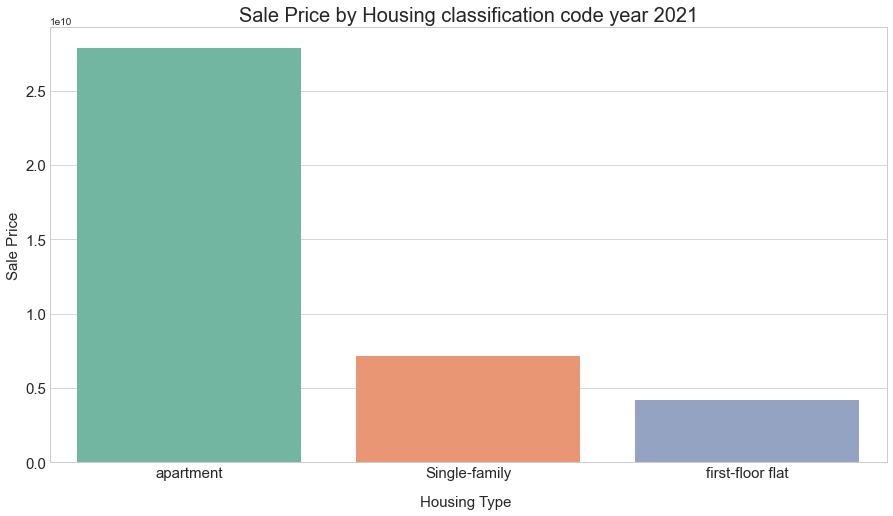

In [27]:
fig , ax = plt.subplots(figsize = (15, 8))
sns.barplot(x =by_hous_2021.index, y = by_hous_2021['Sale price'], order= by_hous_2021.index, palette= "Set2")
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
ax.set_xticklabels(["apartment", "Single-family", "first-floor flat"])
plt.xlabel('Housing Type ', size = 15, labelpad=15)
plt.ylabel('Sale Price', size = 15)
plt.title('Sale Price by Housing classification code year 2021', size = 20)

### By House size code 

In [28]:
by_hous_si = all_rent.groupby('House size code')['Sale price'].agg('sum')
by_hous_si = by_hous_si.to_frame()

In [29]:
by_ho_or = by_hous_si.sort_values('Sale price', ascending=False)

Text(0.5, 1.0, 'Sales price by House size (all time)')

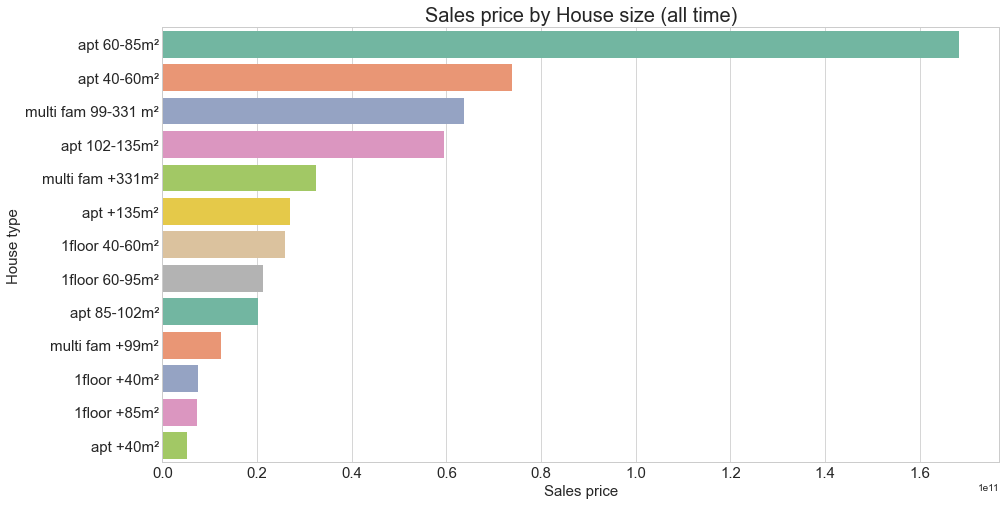

In [30]:
fig, ax = plt.subplots(figsize = (15, 8))
sns.barplot(y = by_ho_or.index, x = by_ho_or['Sale price'], order= by_ho_or.index, orient = 'h', palette= "Set2" )
plt.xlabel("Sales price", size = 15)
plt.ylabel("House type", size = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title('Sales price by House size (all time)', size= 20)

### By house size code 2021

In [31]:
by_hsc_2021 = all_rent[all_rent['Year']=='2021'].groupby('House size code')['Sale price'].agg('sum')
by_hsc_2021 = by_hsc_2021.to_frame()

In [32]:
by_hsc_2021.sort_values('Sale price', ascending=False, inplace=True)

Text(0.5, 1.0, 'Sale price by House size code (2021)')

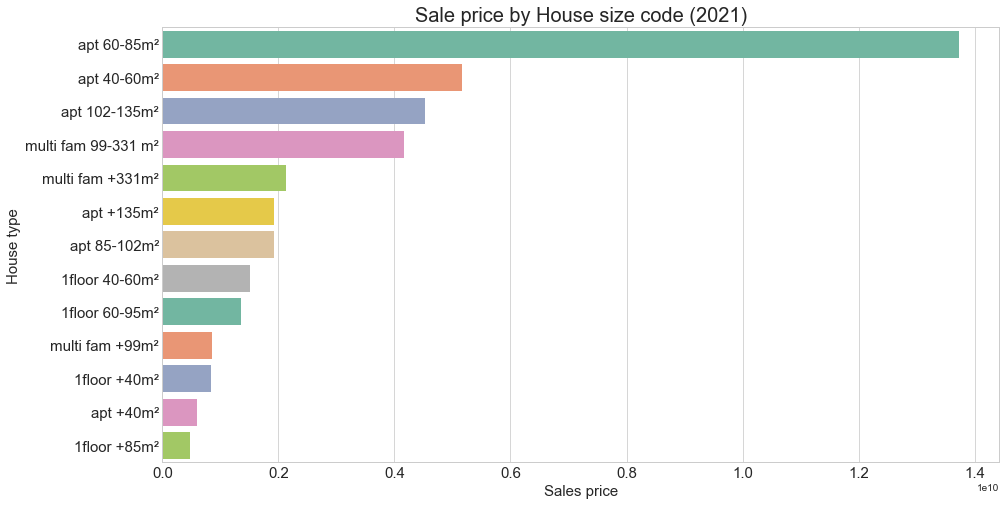

In [33]:
fig, ax = plt.subplots(figsize = (15,8))
sns.barplot(y = by_hsc_2021.index, x = by_hsc_2021['Sale price'], order= by_hsc_2021.index, orient='h', palette= "Set2")
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Sales price", size = 15)
plt.ylabel("House type", size = 15)
plt.title('Sale price by House size code (2021)', size = 20)

### By building age

In [34]:
by_hous_buil = all_rent.groupby('Building age code')['Sale price'].agg('sum')
by_hous_buil = by_hous_buil.to_frame()

In [35]:
by_hous_buil = by_hous_buil.sort_values('Sale price', ascending=False)
by_hous_buil

,Sale price
Building age code,
apt +20 yrs,115580470358.08
apt 10-15 yrs,69626587469.77
20yrs,66904343220.00
apt 15-20 yrs,59583576759.07
apt 5-10 yrs,59411388417.26
apt +5 yrs,50030287284.15
1floor 20yrs,22992001160.00
multi fam 10-20yrs,21865430050.00
1floor 10-20yrs,20165728317.00


Text(0.5, 1.0, 'Sale Price by Building age code (2015-2021)')

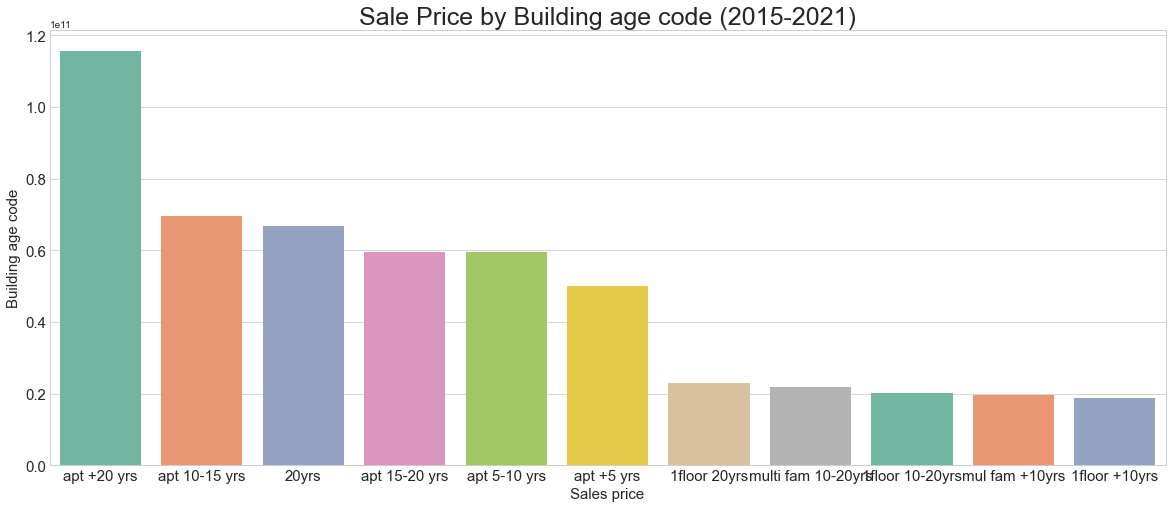

In [36]:
fig, ax = plt.subplots(figsize = (20, 8))
sns.barplot(x = by_hous_buil.index, y = by_hous_buil['Sale price'], order= by_hous_buil.index, palette= "Set2")
plt.xlabel("Sales price", size = 15)
plt.ylabel("Building age code", size = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title('Sale Price by Building age code (2015-2021)', size = 25)

### By building age (2021)

In [37]:
by_ba_2021 = all_rent[all_rent['Year']=="2021"].groupby('Building age code')['Sale price'].agg('sum')
by_ba_2021 = by_ba_2021.to_frame()

In [38]:
by_ba_2021.sort_values('Sale price', ascending=False, inplace=True)

Text(0.5, 1.0, 'Sales price by Building age code (2021)')

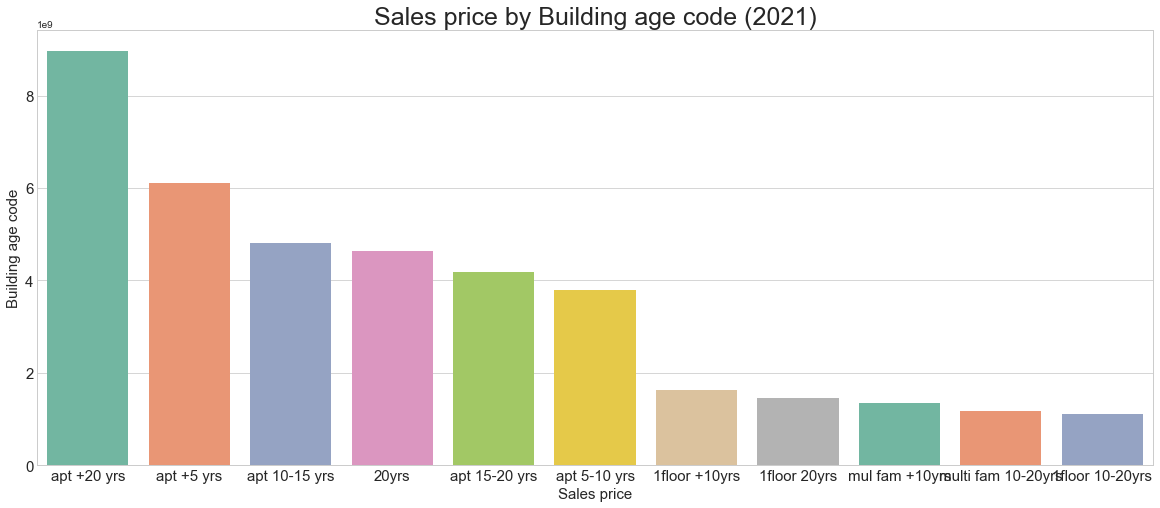

In [39]:
fig, ax = plt.subplots(figsize = (20, 8))
sns.barplot(x = by_ba_2021.index, y = by_ba_2021['Sale price'], order= by_ba_2021.index, palette= "Set2")
plt.xlabel("Sales price", size = 15)
plt.ylabel("Building age code", size = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title('Sales price by Building age code (2021)', size = 25)

# Group by 2 or more columns

In [40]:
three = all_rent.groupby(['Housing classification code', 'House size code'])['Monthly rent'].agg('sum').reset_index(name='total')

([0, 1, 2],
 [Text(0, 0, '1floor flat'),
  Text(0, 1, 'Apartment'),
  Text(0, 2, 'family size house')])

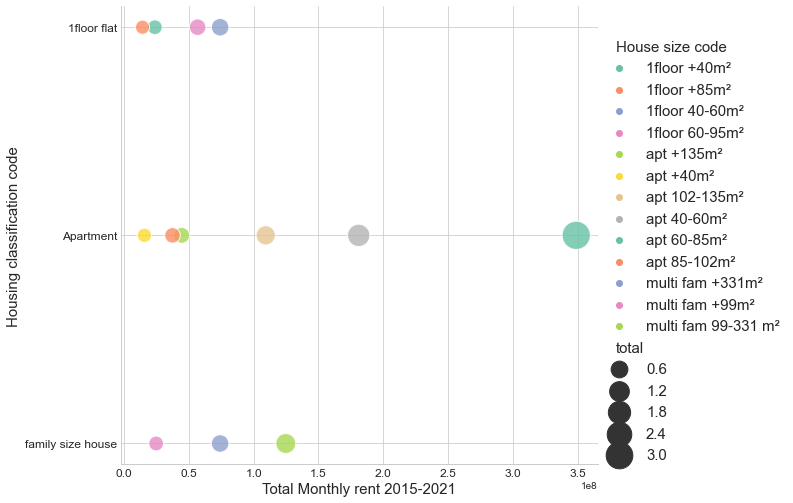

In [41]:
with sns.plotting_context(rc={"legend.fontsize":15}):
    sns.relplot(x = 'total', y= 'Housing classification code', hue= 'House size code', size= 'total', 
                data=three, sizes=(200, 800), height= 7, aspect= 1.2, alpha = 0.8, palette= "Set2" )
plt.xlabel('Total Monthly rent 2015-2021', size= 15)
plt.ylabel('Housing classification code', size = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

In [42]:
three_21 = all_rent[all_rent['Year']=='2021'].groupby(['Housing classification code', 'House size code'])['Monthly rent'].agg('sum').reset_index(name='total')

([0, 1, 2],
 [Text(0, 0, '1floor flat'),
  Text(0, 1, 'Apartment'),
  Text(0, 2, 'family size house')])

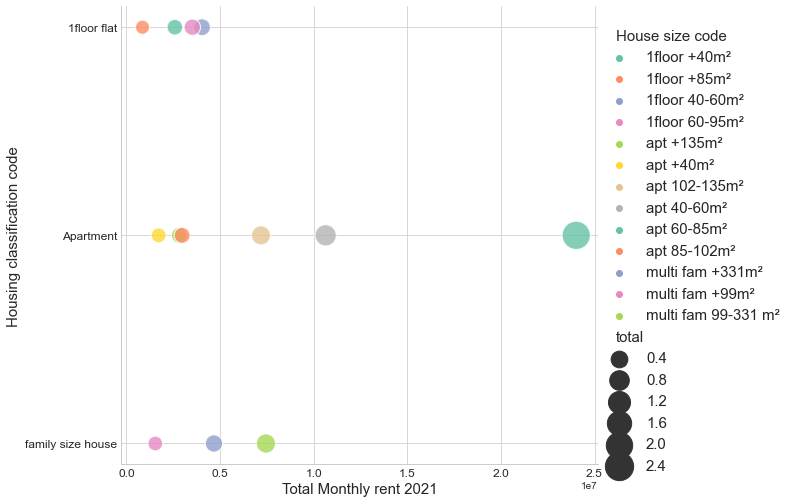

In [43]:
with sns.plotting_context(rc={"legend.fontsize":15}):
    sns.relplot(x = 'total', y= 'Housing classification code', hue= 'House size code', size= 'total', 
                data=three_21, sizes=(200, 800), height= 7, aspect= 1.2, alpha = 0.8, palette= "Set2" )
plt.xlabel('Total Monthly rent 2021', size= 15)
plt.ylabel('Housing classification code', size = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

In [44]:
three_dep = all_rent.groupby(['Year', 'House size code'])['Deposit'].agg('sum').reset_index(name='total')

In [45]:
three_dep

,Year,House size code,total
0,2015,1floor +85m²,118952600
1,2015,1floor 40-60m²,357426200
2,2015,1floor 60-95m²,303116400
3,2015,apt +135m²,398432200
4,2015,apt 102-135m²,852025500
...,...,...,...
82,2021,apt 60-85m²,1600043400
83,2021,apt 85-102m²,196406000
84,2021,multi fam +331m²,250450100
85,2021,multi fam +99m²,77780800


Text(0.5, 1.0, 'Total Deposit by place size (2015-2021)')

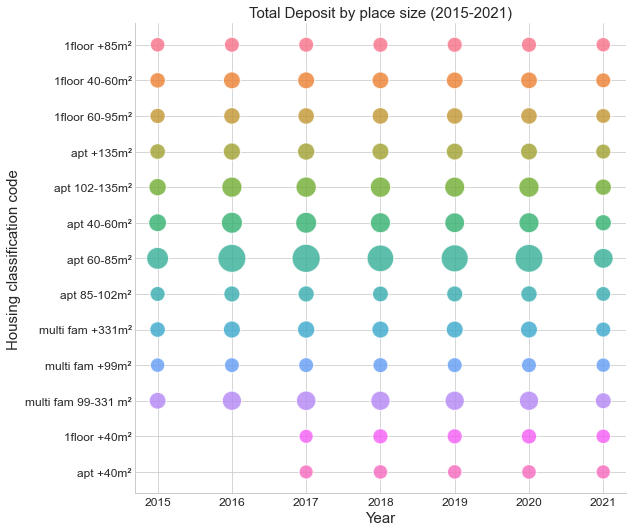

In [46]:
with sns.plotting_context(rc={"legend.fontsize":15}):
    sns.relplot(x = 'Year', y= 'House size code', hue= 'House size code', size= 'total', 
                data=three_dep, sizes=(200, 800), height= 7, aspect= 1.2, alpha = 0.8, legend= False )
plt.xlabel('Year', size= 15)
plt.ylabel('Housing classification code', size = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Total Deposit by place size (2015-2021)', size= 15)

In [54]:
by_year = all_rent

In [55]:
by_year.index = pd.DatetimeIndex(by_year['Survey month'])

In [56]:
by_year

,Year,City and county code,Housing classification code,House size code,Building age code,Survey month,Sale price,landlord,Deposit,Monthly rent
Survey month,,,,,,,,,,
2015-07-01,2015,11110,Apartment,apt 102-135m²,apt 10-15 yrs,2015-07,889000.00,479000,200000,950
2015-07-01,2015,11110,Apartment,apt 102-135m²,apt 10-15 yrs,2015-07,859000.00,459000,200000,900
2015-07-01,2015,11110,Apartment,apt 60-85m²,apt 15-20 yrs,2015-07,522000.00,384000,100000,1350
2015-07-01,2015,11110,Apartment,apt 60-85m²,apt 15-20 yrs,2015-07,542000.00,392000,100000,1400
2015-07-01,2015,11110,Apartment,apt 40-60m²,apt 15-20 yrs,2015-07,299000.00,233000,30000,1000
...,...,...,...,...,...,...,...,...,...,...
2021-04-01,2021,50130,family size house,multi fam 99-331 m²,mul fam +10yrs,2021-04,469000.00,274000,10000,1490
2021-04-01,2021,50130,family size house,multi fam 99-331 m²,mul fam +10yrs,2021-04,521000.00,313000,15000,1460
2021-04-01,2021,50130,family size house,multi fam 99-331 m²,mul fam +10yrs,2021-04,1175000.00,582000,20000,2360


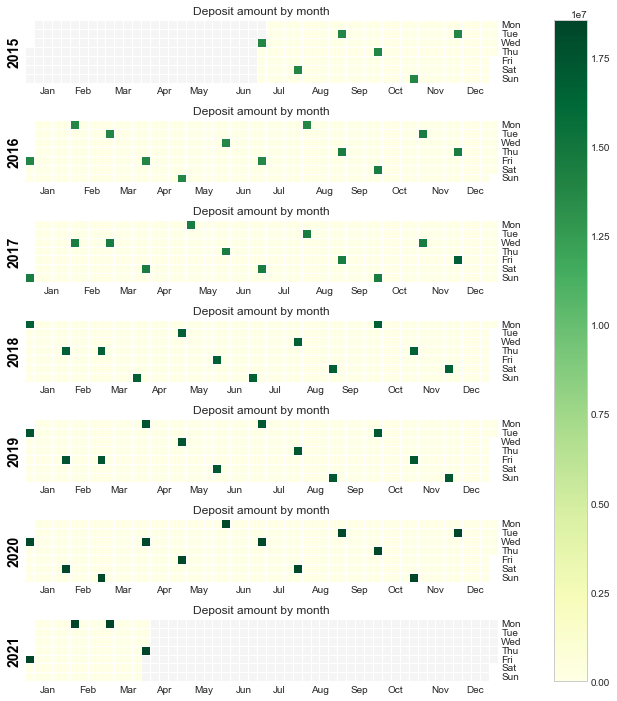

In [70]:
fig, ax = calmap.calendarplot(by_year['Monthly rent'], fig_kws={'figsize': (16,10)}, yearlabel_kws={'color':'black', 'fontsize':14}, 
                    subplot_kws={'title':'Deposit amount by month'}, cmap = 'YlGn')
fig.colorbar(ax[0].get_children()[1], ax=ax.ravel().tolist())